In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.transforms as mtransforms

from cgeniepy.foram import ForamModel as fm
from cgeniepy.plot import scatter_map
from cgeniepy.data import filter_foramdf

plt.rcParams["font.family"] = "Fira Sans"

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


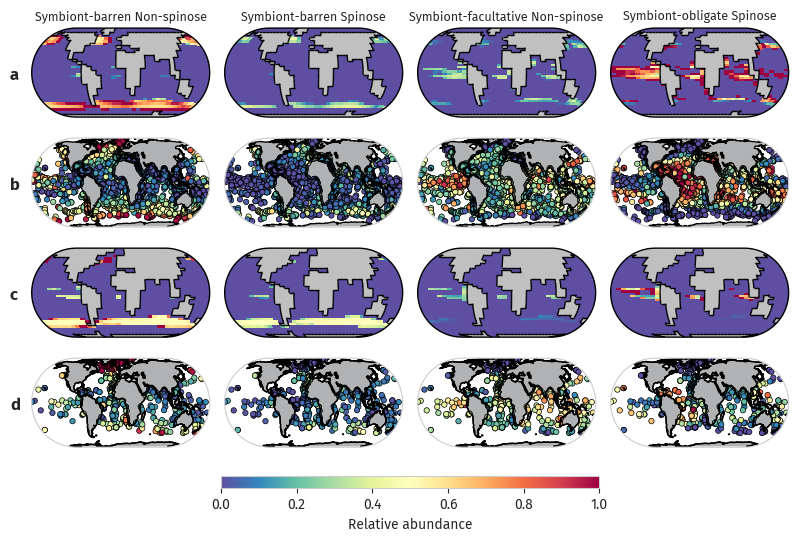

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=4,
                         figsize=(8, 6),
                         subplot_kw=dict(projection=ccrs.EckertIV()))
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

# MODELS
mod_pi = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical")
mod_lgm = fm("../model/muffin.CB.GIteiiva.BASESFeTDTL_rb_foramecogem2.1")

# OBSERVATION DATA
margo = pd.read_csv("../data/lgm_foram_count_data/LGM_MARGO_grouped.csv")
glamap = pd.read_csv("../data/lgm_foram_count_data/LGM_GLAMAP_groupped.csv")
forcens = pd.read_csv("../data/modern_data/ForCenS_modern_grouped.csv")

letters = list(map(chr, range(97, 97+4))) #97 is "a"
name_list = ["bn", "bs", "sn", "ss"]
longname_list = ["Symbiont-barren Non-spinose",
                 "Symbiont-barren Spinose",
                 "Symbiont-facultative Non-spinose",
                 "Symbiont-obligate Spinose"]

for i, ax in enumerate(axes.flat):
    #labelling
    if i%4 == 0:
        ax.text(-0.2, 0.5, letters[i//4], transform=ax.transAxes + trans, weight="bold", fontsize=12)
    if i < 4:
        # plot modern model
        index = i
        p = mod_pi.select_foramtype(name_list[index]).relative_abundance().isel(time=-1).plot_map(ax=ax, vmin=0, vmax=1, cmap="Spectral_r", colorbar=False)
        ax.set_title(longname_list[i], fontsize=9)
    elif i < 8:
        # forcens data
        index = i-4
        df = filter_foramdf(forcens, name_list[index])
        scatter_map(ax=ax, df=df, var="Prop", vmin=0, vmax=1, s=15, cmap="Spectral_r")
    elif i < 12:
        # plot modern model
        index = i - 8
        p = mod_lgm.select_foramtype(name_list[index]).relative_abundance().isel(time=-1).plot_map(ax=ax, vmin=0, vmax=1, cmap="Spectral_r", colorbar=False)
    elif i < 16:
        # margo data
        index = i-12
        glamap_df = filter_foramdf(glamap, name_list[index])
        margo_df = filter_foramdf(margo, name_list[index])

        scatter_map(ax=ax, df=glamap_df, var="Relative_Abundance", vmin=0, vmax=1, s=15, cmap="Spectral_r")
        scatter_map(ax=ax, df=margo_df, var="Prop", vmin=0, vmax=1, s=15, cmap="Spectral_r")


fig.tight_layout()
cbar = fig.colorbar(p, ax=axes.flatten().tolist(),orientation="horizontal", pad=0.05, aspect=30, shrink=0.5)
cbar.set_label("Relative abundance")
fig.savefig("../output/lgm_biogeographic_change.png", dpi=400)

[0.3908323174598315, 0.17563454635144465, 0.23253470335638554, 0.03276358300908482, 0.363748184357445, 0.1657234451491687, 0.19156174552978483, 0.00085796187100065]


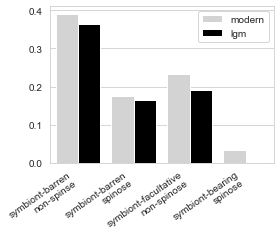

In [4]:
# composition change
# grey colors
m = [mod_pi, mod_lgm]
fs = ["bn", "bs","sn", "ss"]
l = []

for mod in m:
    for foram in fs:
        t = mod.select_foram(foram).export_c().to_calcite().sum().magnitude
        l.append(t)

print(l)

l = np.array(l).T
fl = ["symbiont-barren\nnon-spinse", "symbiont-barren\nspinose",
        "symbiont-facultative\nnon-spinose", "symbiont-bearing\nspinose"]
fl = np.tile(fl,2)
p = ["modern", "lgm"]
p = np.repeat(p, 4)

df = pd.DataFrame({'time': p, "foraminifer": fl, 'value': l})

# plot using seaborn
import seaborn as sns

fig, ax=plt.subplots(figsize=(4, 3.5))
sns.set_style("white")
sns.barplot(data=df, x='foraminifer', y='value', hue='time', palette=["lightgrey", "black"], ax=ax)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(title="")
plt.xticks(rotation = 35, ha="right")
fig.tight_layout()
#fig.savefig("../output/lgm_composition_change.png", dpi=400, transparent=True)